In [18]:
from app.text_matcher import TextAddress

soundex_weight = 0.2

data = []

for soundex_weight in [0.1, 0.2, 0.3, 0.4]:
    input_line_no = 1
    input_addresses = open('data/erroneous_addresses.txt', 'r')

    correct = 0
    incorrect = 0
    accuracy = 0

    text_score_data = []
    soundex_score_data = []
    correctness_data = []

    for input_line in input_addresses:
        max_text_score = 0
        max_soundex_score = 0
        output_line_no = 0

        curr_line_no = 1
        with open('data/addresses.txt', 'r') as addresses:
            for line in addresses:
                addr = TextAddress(line.strip())
                input_address = TextAddress(input_line.strip())
                text_score = input_address.compare_text(addr)
                soundex_score = input_address.compare_sound(addr)  

                text_score_data.append(text_score)
                soundex_score_data.append(soundex_score)
                correctness_data.append(False)

                composite_score = (1 - soundex_weight)*text_score + soundex_weight*soundex_score
                if composite_score > (1 - soundex_weight)*max_text_score + soundex_weight*max_soundex_score:
                    max_text_score = text_score
                    max_soundex_score = soundex_score
                    output_line_no = curr_line_no
                curr_line_no += 1
        
        if output_line_no == input_line_no:
            correct += 1
        else:
            incorrect += 1

        text_score_data.append(max_text_score)
        soundex_score_data.append(max_soundex_score)
        correctness_data.append(True)
            
        input_line_no += 1

    input_addresses.close()

    accuracy = (correct/(correct+incorrect))
    data.append([text_score_data, soundex_score_data, correctness_data, accuracy])

In [17]:
import matplotlib.pyplot as plt

soundex_weight = 0.1
text_score_data = data[0][0][0:728460]
soundex_score_data = data[0][1][0:728460]
correctness_data = data[0][2][0:728460]
accuracy = data[0][3]

plt.scatter(x=text_score_data, y=soundex_score_data, marker='o', color=['red' if is_correct == True else 'blue' for is_correct in correctness_data])
plt.title(f'Accuracy: {100 * accuracy}; Soundex Weight: {soundex_weight}')
plt.xlabel('Text Score')
plt.ylabel('Sound Score')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

4
7284600


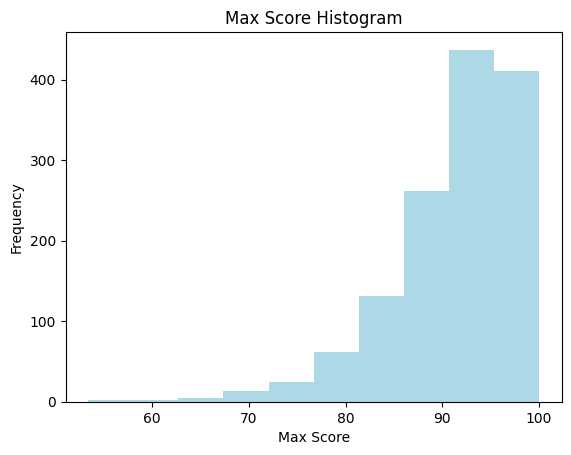

In [6]:
top_score_data = []
for i in range(len(text_score_data)):
    if correctness_data[i]:
        top_score_data.append((1 - soundex_weight)*text_score_data[i] + soundex_weight*soundex_score_data[i])

plt.hist(top_score_data, bins=10, color='lightblue')
 
# Adding labels and title
plt.xlabel('Max Score')
plt.ylabel('Frequency')
plt.title('Max Score Histogram')
 
# Display the plot
plt.show()